In [24]:
# Импортируем библиотеку pandas 
import pandas as pd
# Импортируем библиотеку sqlite3 
import sqlite3 as sql
# Импортируем библиотеку matplotlib
import matplotlib.pyplot as plt
# Импортируем библиотеку seaborn
import seaborn as sns

In [4]:
# загружаем данные
df = pd.read_csv('BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


 1. **Выведите количество пустых значений по колонкам CRIM, ZN, INDUS, CHAS, NOX (название колонки, кол-во пустых значений)**

In [5]:
# Выбираем столбцы, подсчитываем количество пустых значений
empty_values = df[['crim', 'zn', 'indus', 'chas', 'nox']].isnull().sum()

for column in empty_values.index:
    print(f"{column} = {empty_values[column]}")

crim = 0
zn = 0
indus = 0
chas = 0
nox = 0


In [26]:
# С импользованием SQL
# Устанавливаем подключение к базе данных
conn = sqlite3.connect('bostonhousing.db')

# Загружаем данные из csv файла в таблицу housing
df = pd.read_csv('bostonhousing.csv')
df.to_sql('housing', conn, if_exists='replace', index=False)

# Выполняем запрос для подсчета количества пустых значений по заданным колонкам
query = """
SELECT 
    'crim' AS column_name, COUNT(*) - COUNT(crim) AS null_count
FROM 
    housing
UNION ALL
SELECT 
    'zn' AS column_name, COUNT(*) - COUNT(zn) AS null_count
FROM 
    housing
UNION ALL
SELECT 
    'indus' AS column_name, COUNT(*) - COUNT(indus) AS null_count
FROM 
    housing
UNION ALL
SELECT 
    'chas' AS column_name, COUNT(*) - COUNT(chas) AS null_count
FROM 
    housing
UNION ALL
SELECT 
    'nox' AS column_name, COUNT(*) - COUNT(nox) AS null_count
FROM 
    housing
"""

# Выполняем запрос и получаем результат
result = pd.read_sql(query, conn)

# Закрываем подключение к базе данных
conn.close()

# Выводим результат
print(result)

  column_name  null_count
0        crim           0
1          zn           0
2       indus           0
3        chas           0
4         nox           0


**2.Выведите количество уникальных значений по колонокам CRIM, ZN, INDUS, CHAS, NOX (название колонки, кол-во уникальных значений)**

In [7]:
# Выбираем столбцы и считаем количество уникальных значений
uniques = df[['crim', 'zn', 'indus', 'chas', 'nox']].nunique()

for column in uniques.index:
    print(f"{column} = {uniques[column]}")


crim = 504
zn = 26
indus = 76
chas = 2
nox = 81


In [27]:
# С импользованием SQL
# Устанавливаем подключение к базе данных
conn = sqlite3.connect('bostonhousing.db')

# Загружаем данные из csv файла в таблицу housing
df = pd.read_csv('bostonhousing.csv')
df.to_sql('housing', conn, if_exists='replace', index=False)


query = """
SELECT 
    'crim' AS column_name, COUNT(DISTINCT crim) AS unique_values
    FROM housing
    GROUP BY 'crim'
UNION ALL
SELECT 
    'zn' AS column_name, COUNT(DISTINCT zn) AS unique_values
    FROM housing
    GROUP BY 'zn'
UNION ALL
SELECT 
    'indus' AS column_name, COUNT(DISTINCT indus) AS unique_values
    FROM housing
    GROUP BY 'indus'
UNION ALL
SELECT 
    'chas' AS column_name, COUNT(DISTINCT chas) AS unique_values
    FROM housing
    GROUP BY 'chas'
UNION ALL
SELECT 
    'nox' AS column_name, COUNT(DISTINCT nox) AS unique_values
    FROM housing
    GROUP BY 'nox'
"""

# Выполняем запрос и получаем результат
result = pd.read_sql(query, conn)

# Закрываем подключение к базе данных
conn.close()

# Выводим результат
print(result)

  column_name  unique_values
0        crim            504
1          zn             26
2       indus             76
3        chas              2
4         nox             81


**3. Выведите колонки, у которых медиана равна минимальному значению (название колонки) выбирая из CRIM, ZN, INDUS, CHAS, NOX.
Напишите какой вывод можно сделать по данным в этих колонках**

In [9]:
# # Получаем значения медиан для указанных колонок
medians = df[['crim', 'zn', 'indus', 'chas', 'nox']].median()
# Находим минимальное значение медианы
min_median = medians.min()
# Определяем колонки, содержащие минимальные значения медианы
columns = medians[medians == min_median].index.tolist()
# Выводим найденные колонки
print(*columns, sep=', ')
print("Можно сделать вывод о том, что в колонках 'zn' и 'chas' содержатся минимальные значения медиан.")

zn, chas
Можно сделать вывод о том, что в колонках 'zn' и 'chas' содержатся минимальные значения медиан.


**4. Выведите разницу между среднем количеством комнат(RM) в домах с самой дорогой стоимостью(MEDV) и 25 самыми дешевыми домами.**

In [10]:
sorted_data = df.sort_values('medv')

# Выбор 25 самых дешевых домов
cheapest_houses = sorted_data.head(25)

# Вычисление среднего количества комнат в самых дешевых домах. Округление до двух наков после запятой 
cheapest_avg_rm = round(cheapest_houses['rm'].mean(), 2)

# Получение самой дорогой стоимости дома
most_expensive_price = sorted_data['medv'].max()

# Выбор дома с самой дорогой стоимостью
most_expensive_house = sorted_data[sorted_data['medv'] == most_expensive_price]

# Получение среднего количества комнат в доме с самой дорогой стоимостью. Округление до двух наков после запятой 
most_expensive_avg_rm = round(most_expensive_house['rm'].mean(), 2)

# Вычисление разницы между средним количеством комнат в доме с самой дорогой стоимостью и самыми дешевыми домами. Округляем до двух знаков после запятой
difference = round(most_expensive_avg_rm - cheapest_avg_rm, 2)

# Вывод 
print("Среднее колличесвто комнат в 25 самых дешевых домах:", cheapest_avg_rm, "\n"
      "Среднее колличесвто комнат в домах с самой дорогой стоимостью:", most_expensive_avg_rm, "\n"
      "Разница:", difference
     ) 


Среднее колличесвто комнат в 25 самых дешевых домах: 5.73 
Среднее колличесвто комнат в домах с самой дорогой стоимостью: 7.48 
Разница: 1.75


50 домов

In [11]:
# Выбор 50 самых дешевых домов
cheapest_houses_50 = sorted_data.head(50)
# Вычисление среднего количества комнат в 50 самых дешевых домах. Округление до двух наков после запятой 
cheapest_avg_rm_50 = round(cheapest_houses_50['rm'].mean(), 2)
# Вычисление разницы между средним количеством комнат в доме с самой дорогой стоимостью и самыми дешевыми домами. Округляем до двух знаков после запятой
difference_50 = round(most_expensive_avg_rm - cheapest_avg_rm_50, 2)
print("Среднее колличесвто комнат в 50 самых дешевых домах:", cheapest_avg_rm_50, "\n"
      "Среднее колличесвто комнат в домах с самой дорогой стоимостью:", most_expensive_avg_rm, "\n"
      "Разница:", difference_50)

Среднее колличесвто комнат в 50 самых дешевых домах: 5.76 
Среднее колличесвто комнат в домах с самой дорогой стоимостью: 7.48 
Разница: 1.72


100

In [12]:
# Выбор 100 самых дешевых домов
cheapest_houses_100 = sorted_data.head(100)
# Вычисление среднего количества комнат в 100 самых дешевых домах. Округление до двух наков после запятой 
cheapest_avg_rm_100 = round(cheapest_houses_100['rm'].mean(), 2)
# Вычисление разницы между средним количеством комнат в доме с самой дорогой стоимостью и самыми дешевыми домами. Округляем до двух знаков после запятой
difference_100 = round(most_expensive_avg_rm - cheapest_avg_rm_100, 2)
print("Среднее колличесвто комнат в 100 самых дешевых домах:", cheapest_avg_rm_100, "\n"
      "Среднее колличесвто комнат в домах с самой дорогой стоимостью:", most_expensive_avg_rm, "\n"
      "Разница:", difference_100)

Среднее колличесвто комнат в 100 самых дешевых домах: 5.88 
Среднее колличесвто комнат в домах с самой дорогой стоимостью: 7.48 
Разница: 1.6


200

In [13]:
# Выбор 200 самых дешевых домов
cheapest_houses_200 = sorted_data.head(200)
# Вычисление среднего количества комнат в 200 самых дешевых домах. Округление до двух наков после запятой 
cheapest_avg_rm_200 = round(cheapest_houses_200['rm'].mean(), 2)
# Вычисление разницы между средним количеством комнат в доме с самой дорогой стоимостью и самыми дешевыми домами. Округляем до двух знаков после запятой
difference_200 = round(most_expensive_avg_rm - cheapest_avg_rm_200, 2)
print("Среднее колличесвто комнат в 200 самых дешевых домах:", cheapest_avg_rm_200, "\n"
      "Среднее колличесвто комнат в домах с самой дорогой стоимостью:", most_expensive_avg_rm, "\n"
      "Разница:", difference_200)

Среднее колличесвто комнат в 200 самых дешевых домах: 5.91 
Среднее колличесвто комнат в домах с самой дорогой стоимостью: 7.48 
Разница: 1.57


In [183]:
# Выбор 300 самых дешевых домов
cheapest_houses_300 = sorted_data.head(300)
# Вычисление среднего количества комнат в 300 самых дешевых домах. Округление до двух наков после запятой 
cheapest_avg_rm_300 = round(cheapest_houses_300['rm'].mean(), 2)
# Вычисление разницы между средним количеством комнат в доме с самой дорогой стоимостью и самыми дешевыми домами. Округляем до двух знаков после запятой
difference_300 = round(most_expensive_avg_rm - cheapest_avg_rm_300, 2)
print("Среднее колличесвто комнат в 300 самых дешевых домах:", cheapest_avg_rm_300, "\n"
      "Среднее колличесвто комнат в домах с самой дорогой стоимостью:", most_expensive_avg_rm, "\n"
      "Разница:", difference_300)

Среднее колличесвто комнат в 300 самых дешевых домах: 5.97 
Среднее колличесвто комнат в домах с самой дорогой стоимостью: 7.48 
Разница: 1.51


**5. Выведите ранги значений колонки LSTAT(процент населения с более низким статусом) в домах с самой дорогой стоимостью (значение LSTAT, стоимость, ранг). Напишите какой вывод можно сделать по этим данным.**

In [56]:
# Сортируем данные по столбцу 'medv' в порядке убывания
sorted_data = df.sort_values('medv', ascending=False)
# Находим значение «lstat», соответствующее первой строке отсортированных данных (с наибольшим значением «medv») 
high_cost_lstat = sorted_data.iloc[0]['lstat']
# Вычисляем ранг этього значения «lstat» в отсортированных данных
rank = sorted_data[sorted_data['lstat'] <= high_cost_lstat].shape[0]
# Выводим результаты
print(f"Значение lstat: {high_cost_lstat}")
print(f"Стоимость дома: {sorted_data.iloc[0]['medv']}")
print(f"Ранг: {rank}")
print("Можно сделать следующий вывод: Цена дома и процент населения с более низким статусом имеют обратную корреляцию, \nто есть чем выше цена дома, тем ниже процент населения с более низким статусом. Дома с самой высокой стоимостью \nимеют в значительной мере низкий процент населения с более низким статусом.")

Значение lstat: 3.16
Стоимость дома: 50.0
Ранг: 16
Можно сделать следующий вывод: Цена дома и процент населения с более низким статусом имеют обратную корреляцию, 
то есть чем выше цена дома, тем ниже процент населения с более низким статусом. Дома с самой высокой стоимостью 
имеют в значительной мере низкий процент населения с более низким статусом.


**6. Выведите среднюю стоимость домов граничащих с рекой(CHAS) и нет (граничит/не граничит, стоимость)**

In [20]:
# Фильтруем датафрейм по столбцу 'chas' и сохраняем дома, граничащие с рекой
houses_by_river = df[df['chas'] == 1]
# Фильтруем датафрейм по столбцу 'chas' и сохраняем дома, не граничащие с рекой
houses_without_river = df[df['chas'] == 0]
# Вычисляем среднюю стоимость домов, граничащих с рекой
average_price_by_river = round(houses_by_river['medv'].mean(), 2)
# Вычисляем среднюю стоимость домов, не граничащих с рекой
average_price_without_river = round(houses_without_river['medv'].mean(), 2)
print("Средняя стоимость домов, граничащих с рекой:", average_price_by_river)
print("Средняя стоимость домов, не граничащих с рекой:", average_price_without_river)


Средняя стоимость домов, граничащих с рекой: 28.44
Средняя стоимость домов, не граничащих с рекой: 22.09


**7. Выведите все колонки, у которых среднее значение выше, когда дом граничит с рекой (название колонки) выбирая из CRIM, ZN, INDUS, CHAS, NOX. Напишите какой вывод можно сделать по этим данным.**

In [61]:
# Определяем условие для фильтрации колонок
condition = df[['crim', 'zn', 'indus', 'chas', 'nox']].mean() > df[df['chas'] == 1][['crim', 'zn', 'indus', 'chas', 'nox']].mean()

# Фильтруем колонки, удовлетворяющие условию
selected_columns = condition[condition].index.tolist()

for column in selected_columns:
     print(column)
    
print("Можно сделать вывод о том, что уровень преступности ('crim') и доля жилой земли, зонированной на участки площадью более 25 000 кв. футов ('zn') \nвыше когда дом граничит с рекой")

crim
zn
Можно сделать вывод о том, что уровень преступности ('crim') и доля жилой земли, зонированной на участки площадью более 25 000 кв. футов ('zn') 
выше когда дом граничит с рекой


**8. Выведите значения долей промышленной застройки(INDUS), концентрации оксидов азота(NOX) и по их перцентилям - 10, 20 ... 100 ( перцетиль(10,20...100),значение INDUS, значение NOX). Напишите прослеживается ли между ними взаимосвязь**

In [39]:

# Выбираем столбцы indus и nox
indus = df['indus']
nox = df['nox']

# Вычисляем перцентили для indus и nox
indus_percentiles = indus.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
nox_percentiles = nox.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Выводим значения перцентилей для indus и nox
print("Перцентили для indus:")
for p, value in zip(indus_percentiles.index, indus_percentiles.values):
    print(f"{p * 100}%: {value}")
    
print("\nПерцентили для nox:")
for p, value in zip(nox_percentiles.index, nox_percentiles.values):
    print(f"{p * 100}%: {value}")

# Вычисляем корреляцию между indus и nox
correlation = indus.corr(nox)
if correlation > 0:
    print("\nМежду indus и nox прослеживается положительная взаимосвязь.")
elif correlation < 0:
    print("\nМежду indus и nox прослеживается отрицательная взаимосвязь.")
else:
    print("\nМежду indus и nox не прослеживается взаимосвязь.")

Перцентили для indus:
10.0%: 2.91
20.0%: 4.39
30.0%: 5.96
40.0%: 7.38
50.0%: 9.69
60.0%: 12.83
70.0%: 18.1
80.0%: 18.1
90.0%: 19.58
100.0%: 27.74

Перцентили для nox:
10.0%: 0.427
20.0%: 0.442
30.0%: 0.472
40.0%: 0.507
50.0%: 0.538
60.0%: 0.575
70.0%: 0.605
80.0%: 0.668
90.0%: 0.713
100.0%: 0.871

Между indus и nox прослеживается положительная взаимосвязь.


**9. Выведите корреляцию признаков**

In [14]:
corr = df.corr()
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


**10. Постойте график расброса цен на дома**

Text(13.819444444444445, 0.5, 'Количество домов')

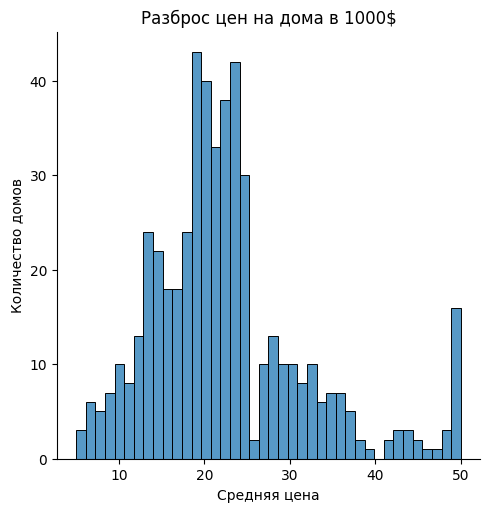

In [16]:
#Построим график расброса цен на дома
sns.displot(df['medv'], bins=40)
plt.title('Разброс цен на дома в 1000$')
plt.xlabel('Средняя цена')
plt.ylabel('Количество домов')

**11. Постройте матрицу корреляции признаков**

Text(0.5, 1.0, 'Корреляция признаков')

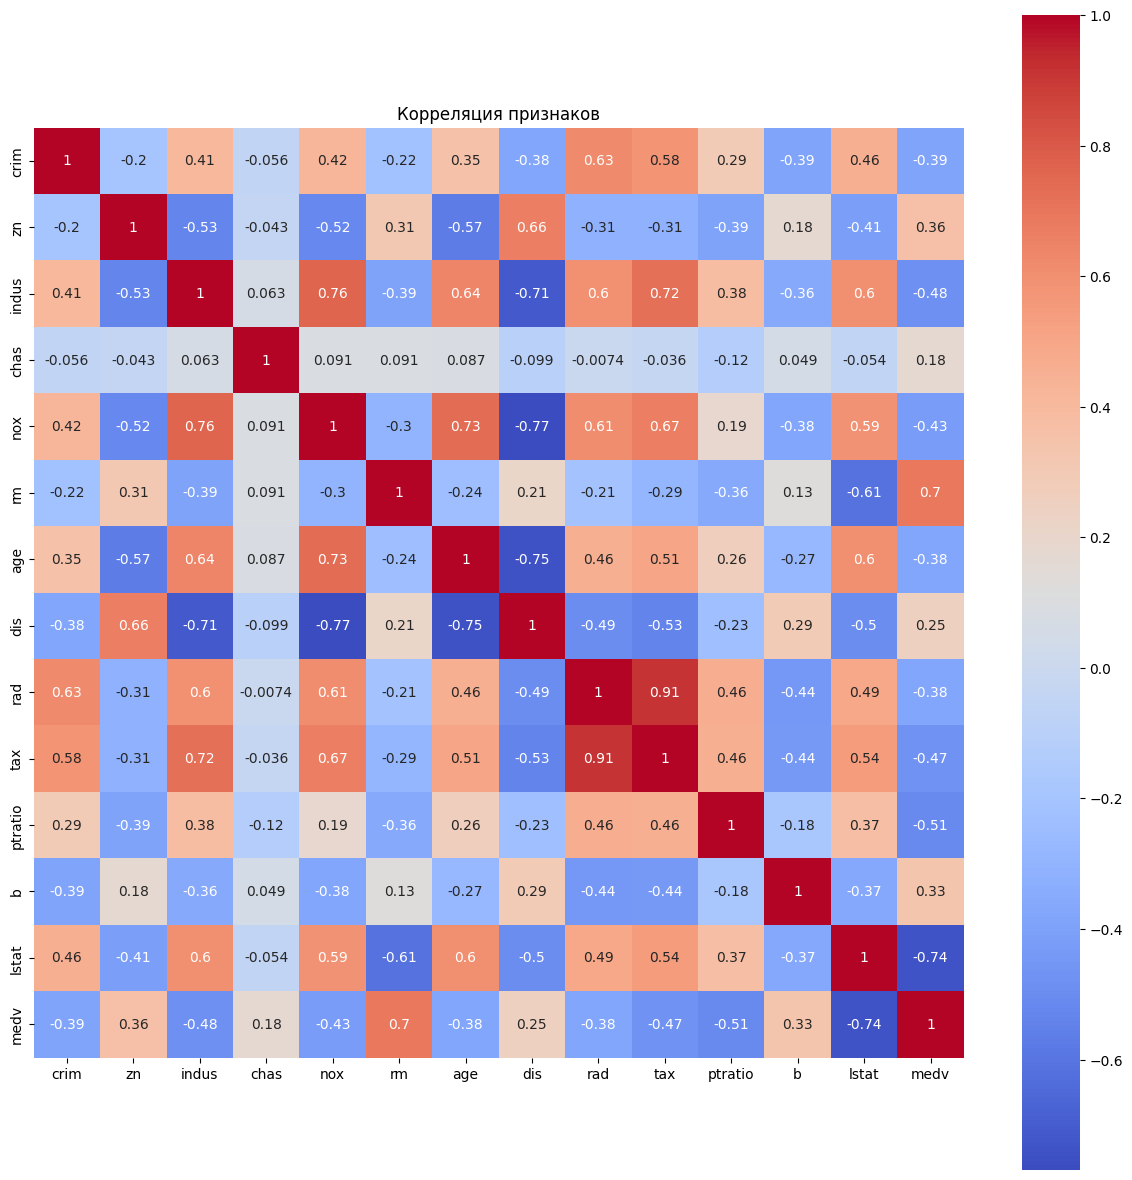

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2g', cmap='coolwarm')
plt.title('Корреляция признаков')